In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import math
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse


from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

sys.path.append('..')

from dataset.artificial_dataset import ArtificialDatasetReader

# Build Dataset

In [3]:
dr = ArtificialDatasetReader()
x_train, y_train, x_val, y_val, x_test, y_test = dr.get_dataset(scale=2)

In [4]:
# check shapes
len(x_train), x_train[0].shape, len(y_train), y_train[0].shape, len(x_val), len(y_val), len(x_test), len(y_test)

(1064, (32, 32), 1064, (64, 64), 425, 425, 639, 639)

In [5]:
x_train_4x, y_train_4x, x_val_4x, y_val_4x, x_test_4x, y_test_4x = dr.get_dataset(scale=4)

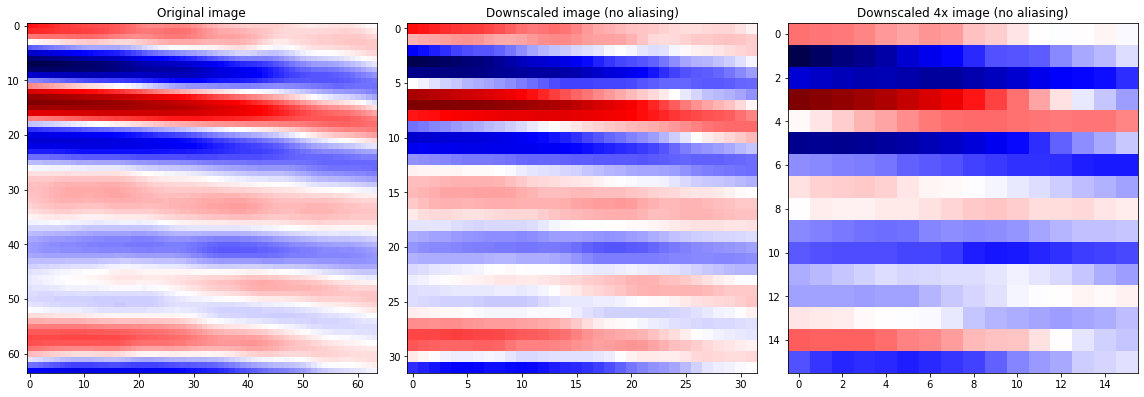

In [6]:
fig, axes = plt.subplots(ncols=3)

ax = axes.ravel()

ax[0].imshow(y_train[982], cmap='seismic')
ax[0].set_title("Original image")

ax[1].imshow(x_train[982], cmap='seismic')
ax[1].set_title("Downscaled image (no aliasing)")

ax[2].imshow(x_train_4x[982], cmap='seismic')
ax[2].set_title("Downscaled 4x image (no aliasing)")

plt.tight_layout()
plt.show()

# Baseline

Performs interpolation to up-scale

In [7]:
class Baseline:
    def __init__(self, scale=2):
        self.scale = scale

    def predict(self, x):
        return [cv2.resize(img, (img.shape[0]*self.scale, img.shape[1]*self.scale)) for img in x]

In [8]:
baseline = Baseline(scale=2)
y_pred = baseline.predict(x_train)

baseline_4x = Baseline(scale=4)
y_pred_4x = baseline_4x.predict(x_train_4x)

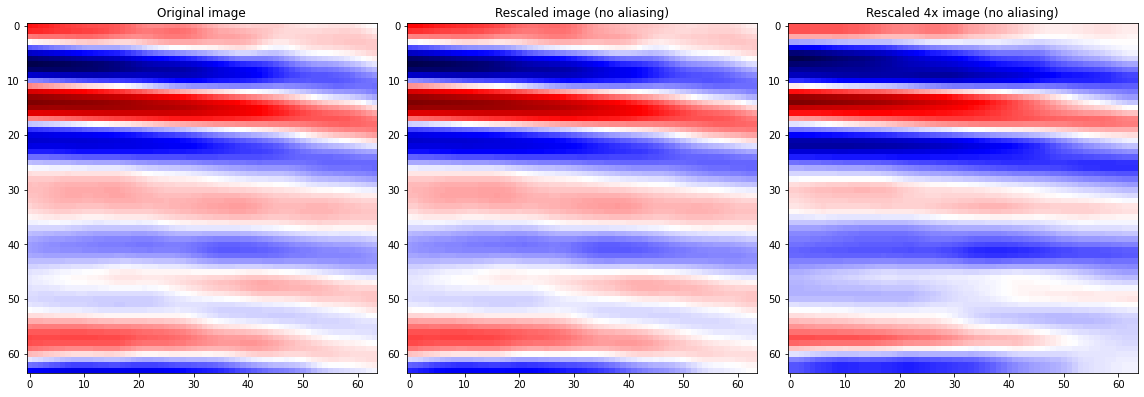

In [9]:
fig, axes = plt.subplots(ncols=3)

ax = axes.ravel()

ax[0].imshow(y_train[982], cmap='seismic')
ax[0].set_title("Original image")

ax[1].imshow(y_pred[982], cmap='seismic')
ax[1].set_title("Rescaled image (no aliasing)")

ax[2].imshow(y_pred_4x[982], cmap='seismic')
ax[2].set_title("Rescaled 4x image (no aliasing)")

plt.tight_layout()
plt.show()

# Metrics

### PSNR

In [10]:
PIXEL_MAX = 0
for i in y_train:
    if i.max() > PIXEL_MAX:
        PIXEL_MAX = i.max()
PIXEL_MAX

1.0

In [11]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 1
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [12]:
psnr(y_train[410], y_pred[410])

49.628162067075095

In [13]:
psnr_sum = 0

for i in range(len(y_train)):
    psnr_sum += psnr(y_train[i], y_pred[i])

print(f"Mean PSNR {psnr_sum/len(y_train)}")

Mean PSNR 54.28851464653061


#### 4x

In [14]:
psnr_sum = 0

for i in range(len(y_train_4x)):
    psnr_sum += psnr(y_train_4x[i], y_pred_4x[i])

print(f"Mean PSNR {psnr_sum/len(y_train_4x)}")

Mean PSNR 45.50676897775477


### MSE

In [15]:
mse_sum = 0

for i in range(len(y_train)):
    mse_sum += mse(y_train[i], y_pred[i])

print(f"Mean MSE {mse_sum/len(y_train)}")

Mean MSE 0.00010272840853276835


#### 4x

In [16]:
mse_sum = 0

for i in range(len(y_train_4x)):
    mse_sum += mse(y_train_4x[i], y_pred_4x[i])

print(f"Mean MSE {mse_sum/len(y_train_4x)}")

Mean MSE 0.0008557980788863986
